In [ ]:
#gpt chatlog:  https://chatgpt.com/share/672d5dad-824c-8003-9a63-29f89e5906f8

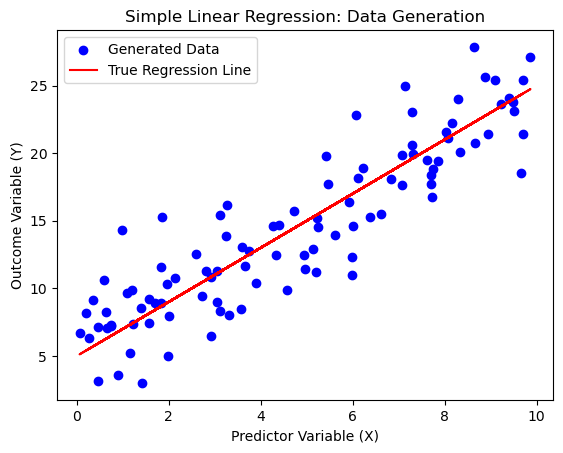

In [1]:
#Problem 1
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set random seed for reproducibility
np.random.seed(42)

# Define parameters for the linear model
beta_0 = 5  # Intercept
beta_1 = 2  # Slope
sigma = 3   # Standard deviation of the error term

# Generate predictor variable X (e.g., 100 samples from a uniform distribution)
n_samples = 100
X = np.random.uniform(0, 10, n_samples)

# Generate error term epsilon from a normal distribution
epsilon = norm.rvs(loc=0, scale=sigma, size=n_samples)

# Calculate outcome variable Y using the linear model
Y = beta_0 + beta_1 * X + epsilon

# Plot the generated data
plt.scatter(X, Y, color='blue', label='Generated Data')

# Plot the true regression line without noise
Y_true = beta_0 + beta_1 * X
plt.plot(X, Y_true, color='red', label='True Regression Line')

plt.xlabel('Predictor Variable (X)')
plt.ylabel('Outcome Variable (Y)')
plt.title('Simple Linear Regression: Data Generation')
plt.legend()
plt.show()


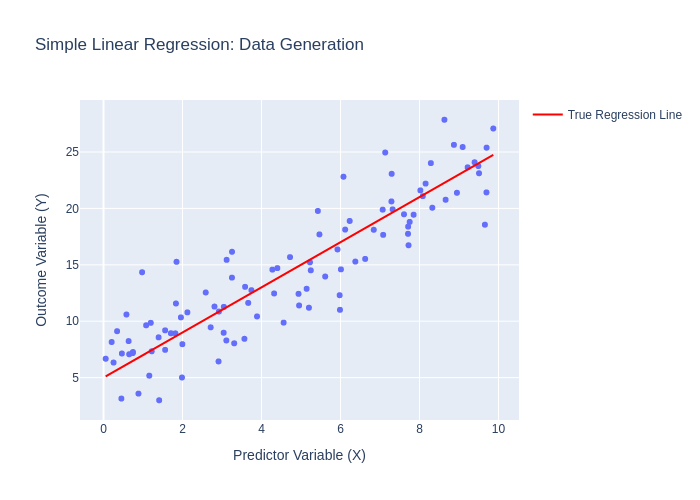

In [15]:
#Also for problem one, but using px as required
import numpy as np
import plotly.express as px
import pandas as pd
from scipy.stats import norm

# Set random seed for reproducibility
np.random.seed(42)

# Define parameters for the linear model
beta_0 = 5  # Intercept
beta_1 = 2  # Slope
sigma = 3   # Standard deviation of the error term

# Generate predictor variable X (e.g., 100 samples from a uniform distribution)
n_samples = 100
X = np.random.uniform(0, 10, n_samples)

# Generate error term epsilon from a normal distribution
epsilon = norm.rvs(loc=0, scale=sigma, size=n_samples)

# Calculate outcome variable Y using the linear model
Y = beta_0 + beta_1 * X + epsilon

# Create a DataFrame for easier plotting with plotly
data = pd.DataFrame({'X': X, 'Y': Y})

# Plot the generated data using plotly express
fig = px.scatter(data, x='X', y='Y', title='Simple Linear Regression: Data Generation', labels={'X': 'Predictor Variable (X)', 'Y': 'Outcome Variable (Y)'})

# Add the true regression line without noise
data['Y_true'] = beta_0 + beta_1 * X
fig.add_scatter(x=data['X'], y=data['Y_true'], mode='lines', name='True Regression Line', line=dict(color='red'))

fig.show(renderer="png")


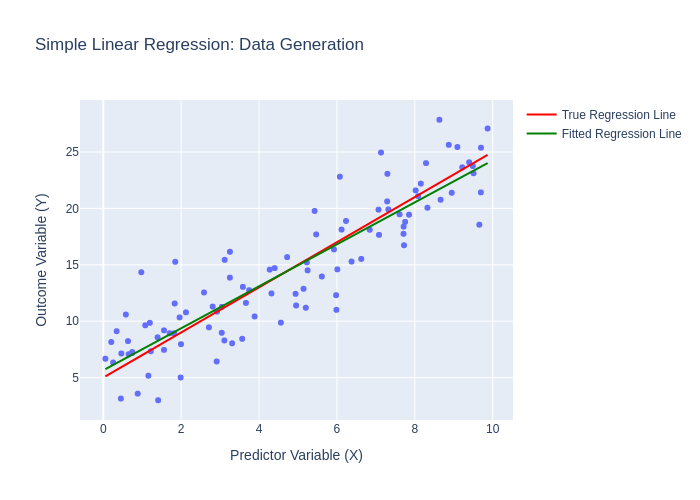

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     410.1
Date:                Fri, 08 Nov 2024   Prob (F-statistic):           8.49e-37
Time:                        01:32:08   Log-Likelihood:                -241.01
No. Observations:                 100   AIC:                             486.0
Df Residuals:                      98   BIC:                             491.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6453      0.511     11.051      0.0

In [13]:
#This code satisfied Problem one and two at the same time, since I asked chatbot to update the code instead of writting a new one
#Which, is really, the goal of problem 3
#Again, model.summary() is used as well, making it effective answer for problem 4
import numpy as np
import plotly.express as px
import pandas as pd
from scipy.stats import norm
import statsmodels.formula.api as smf
import plotly.graph_objects as go

# Set random seed for reproducibility
np.random.seed(42)

# Define parameters for the linear model
beta_0 = 5  # Intercept
beta_1 = 2  # Slope
sigma = 3   # Standard deviation of the error term

# Generate predictor variable X (e.g., 100 samples from a uniform distribution)
n_samples = 100
X = np.random.uniform(0, 10, n_samples)

# Generate error term epsilon from a normal distribution
epsilon = norm.rvs(loc=0, scale=sigma, size=n_samples)

# Calculate outcome variable Y using the linear model
Y = beta_0 + beta_1 * X + epsilon

# Create a DataFrame for easier plotting with plotly
data = pd.DataFrame({'X': X, 'Y': Y})

# Plot the generated data using plotly express
fig = px.scatter(data, x='X', y='Y', title='Simple Linear Regression: Data Generation', labels={'X': 'Predictor Variable (X)', 'Y': 'Outcome Variable (Y)'})

# Add the true regression line without noise
data['Y_true'] = beta_0 + beta_1 * X
fig.add_scatter(x=data['X'], y=data['Y_true'], mode='lines', name='True Regression Line', line=dict(color='red'))

# Fit a simple linear regression model using statsmodels
model = smf.ols('Y ~ X', data=data).fit()

# Add the fitted regression line to the plot
data['Y_fitted'] = model.fittedvalues
fig.add_trace(go.Scatter(x=data['X'], y=data['Y_fitted'], mode='lines', name='Fitted Regression Line', line=dict(color='green')))

# Show the plot
fig.show(renderer="png")

# Print the summary of the fitted model
print(model.summary())
print(model.params)
#print(model.params.values)

In [16]:
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

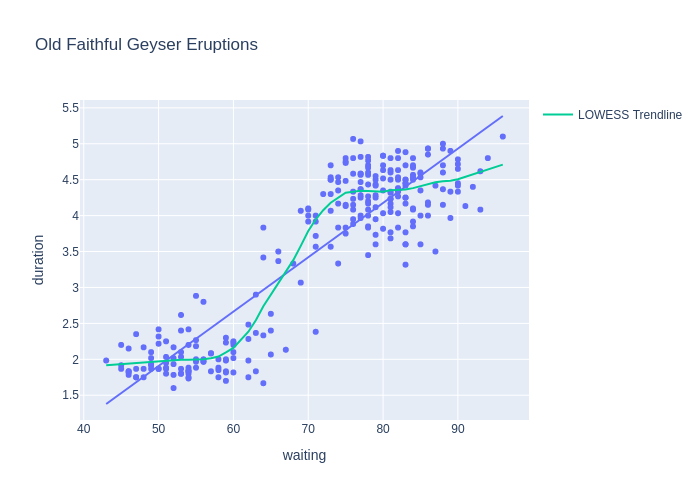

In [17]:
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

# The "Classic" Old Faithful Geyser dataset: ask a ChatBot for more details if desired
old_faithful = sns.load_dataset('geyser')

# Create a scatter plot with a Simple Linear Regression trendline
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions", 
                 trendline='ols')#'lowess'

# Add a smoothed LOWESS Trendline to the scatter plot
lowess = sm.nonparametric.lowess  # Adjust 'frac' to change "smoothness bandwidth"
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

fig.show(renderer="png")

In [1]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Fri, 08 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        02:47:26   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8619      0.327      2.637      0.010       0.213       1.511
waiting        0.0221      0.006      3.704      0.000       0.010       0.034


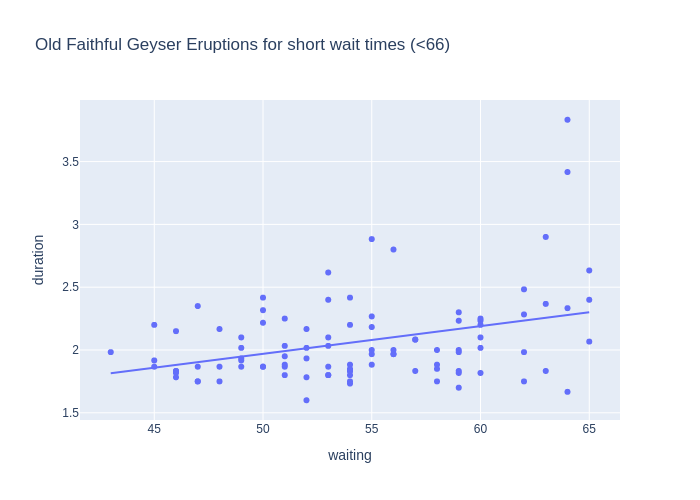

In [8]:
import plotly.express as px
import statsmodels.formula.api as smf

#short_wait_limit = 62
#short_wait_limit = 64
short_wait_limit = 66
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png")

In [10]:
import plotly.express as px

long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[long_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for long wait times (>"+str(long_wait_limit)+")", 
                 trendline='ols')
fig.show()

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


In [11]:
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
import statsmodels.api as sm
import pandas as pd
from scipy import stats

# Load Old Faithful dataset
old_faithful = sns.load_dataset('geyser')

# Define long wait times
long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

# Fit a linear model to the long wait times and print the summary
fitted_model = smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit()
print(fitted_model.summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[long_wait], x='waiting', y='duration',
                 title="Old Faithful Geyser Eruptions for long wait times (>"+str(long_wait_limit)+")",
                 trendline='ols')
fig.show()

# Bootstrap sampling for slope coefficients
bootstrapped_slope_coefficients = []
num_bootstrap_samples = 1000

for _ in range(num_bootstrap_samples):
    boot_sample = old_faithful[long_wait].sample(n=long_wait.sum(), replace=True)
    boot_model = smf.ols('duration ~ waiting', data=boot_sample).fit()
    bootstrapped_slope_coefficients.append(boot_model.params['waiting'])

bootstrapped_slope_coefficients = np.array(bootstrapped_slope_coefficients)

# Plot the bootstrapped sampling distribution of the slope coefficients
fig_boot = px.histogram(bootstrapped_slope_coefficients, nbins=30, 
                        title='Bootstrapped Sampling Distribution of Slope Coefficients',
                        labels={'value': 'Slope Coefficient', 'count': 'Frequency'})
fig_boot.show()

# Simulate data under the null hypothesis of no linear association
old_faithful_simulation = old_faithful[long_wait].copy()
old_faithful_simulation['duration'] = 1.65 + 0 * old_faithful_simulation.waiting + stats.norm(loc=0, scale=0.37).rvs(size=long_wait.sum())

# Fit linear models to simulated data to collect slope coefficients
simulated_slope_coefficients = []

for _ in range(num_bootstrap_samples):
    sim_sample = old_faithful_simulation.sample(n=long_wait.sum(), replace=True)
    sim_model = smf.ols('duration ~ waiting', data=sim_sample).fit()
    simulated_slope_coefficients.append(sim_model.params['waiting'])

simulated_slope_coefficients = np.array(simulated_slope_coefficients)

# Plot the simulated sampling distribution of the slope coefficients
fig_sim = px.histogram(simulated_slope_coefficients, nbins=30, 
                       title='Simulated Sampling Distribution of Slope Coefficients under Null Hypothesis',
                       labels={'value': 'Slope Coefficient', 'count': 'Frequency'})
fig_sim.show()

# Calculate 95% bootstrapped confidence interval
boot_conf_interval = np.quantile(bootstrapped_slope_coefficients, [0.025, 0.975])
print("95% Bootstrapped Confidence Interval for Slope Coefficient:", boot_conf_interval)

# Calculate p-value for simulated slope coefficients
observed_slope = fitted_model.params['waiting']
p_value = (np.abs(simulated_slope_coefficients) >= np.abs(observed_slope)).mean()
print("Simulated p-value for the slope coefficient:", p_value)

# Check if observed slope is within the 95% confidence interval
is_contained = boot_conf_interval[0] <= observed_slope <= boot_conf_interval[1]
print("Is the observed slope within the 95% bootstrapped confidence interval?", is_contained)

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


95% Bootstrapped Confidence Interval for Slope Coefficient: [0.0012016  0.02449074]
Simulated p-value for the slope coefficient: 0.029
Is the observed slope within the 95% bootstrapped confidence interval? True


In [14]:
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import plotly.express as px
import pandas as pd
from scipy.stats import norm

# Load the Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

# Filter the dataset to only include rows with waiting time greater than 71 minutes
long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit
long_wait_data = old_faithful[long_wait]

# Fit a simple linear regression model for 'duration' as a function of 'waiting' for long wait times
linear_model = smf.ols('duration ~ waiting', data=long_wait_data)
fitted_model = linear_model.fit()

# Print the summary of the fitted model
print(fitted_model.summary())

# Generate predictions using the fitted model
waiting_values = np.linspace(long_wait_data['waiting'].min(), long_wait_data['waiting'].max(), 100)
predicted_duration = fitted_model.params['Intercept'] + fitted_model.params['waiting'] * waiting_values

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'waiting': waiting_values, 'predicted_duration': predicted_duration})

# Plot the data and the fitted regression line using plotly express
fig = px.scatter(long_wait_data, x='waiting', y='duration', title='Old Faithful Geyser Eruptions for Long Wait Times (> 71 minutes)', labels={'waiting': 'Waiting Time (minutes)', 'duration': 'Eruption Duration (minutes)'})
fig.add_scatter(x=plot_data['waiting'], y=plot_data['predicted_duration'], mode='lines', name='Fitted Regression Line', line=dict(color='red'))

fig.show()

# Bootstrap sampling for slope coefficients
bootstrapped_slope_coefficients = []
num_bootstrap_samples = 1000

for _ in range(num_bootstrap_samples):
    boot_sample = long_wait_data.sample(n=long_wait_data.shape[0], replace=True)
    boot_model = smf.ols('duration ~ waiting', data=boot_sample).fit()
    bootstrapped_slope_coefficients.append(boot_model.params['waiting'])

bootstrapped_slope_coefficients = np.array(bootstrapped_slope_coefficients)

# Plot the bootstrapped sampling distribution of the slope coefficients using plotly express
fig_boot = px.histogram(bootstrapped_slope_coefficients, nbins=30, 
                        title='Bootstrapped Sampling Distribution of Slope Coefficients',
                        labels={'value': 'Slope Coefficient', 'count': 'Frequency'})
fig_boot.show()


                            OLS Regression Results                            
Dep. Variable:               duration   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     4.372
Date:                Fri, 08 Nov 2024   Prob (F-statistic):             0.0381
Time:                        03:21:01   Log-Likelihood:                -68.319
No. Observations:                 160   AIC:                             140.6
Df Residuals:                     158   BIC:                             146.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.0

In [27]:
B0 = 1.65
B1 = 0
sigma = 0.37
n_samples = 160

# Perform 1000 simulations under the null hypothesis and collect the slope coefficients
simulated_slope_coefficients = []

for _ in range(num_bootstrap_samples):
    simulated_durations = B0 + B1 * long_wait_data['waiting'][:n_samples] + norm.rvs(loc=0, scale=sigma, size=n_samples)
    simulated_data = pd.DataFrame({'waiting': long_wait_data['waiting'][:n_samples], 'duration': simulated_durations})
    sim_model = smf.ols('duration ~ waiting', data=simulated_data).fit()
    simulated_slope_coefficients.append(sim_model.params['waiting'])

simulated_slope_coefficients = np.array(simulated_slope_coefficients)

# Plot the simulated sampling distribution of the slope coefficients under null hypothesis
fig_sim_slope = px.histogram(simulated_slope_coefficients, nbins=30, 
                             title='Simulated Sampling Distribution of Slope Coefficients under Null Hypothesis',
                             labels={'value': 'Slope Coefficient', 'count': 'Frequency'})
fig_sim_slope.show()


In [26]:
# Check if the observed slope is within the 95% bootstrapped confidence interval
is_contained = boot_conf_interval[0] <= 0 <= boot_conf_interval[1]
print("Is the observed slope within the 95% bootstrapped confidence interval?", is_contained)

# Calculate the p-value for the simulated slope coefficients under the null hypothesis
p_value = (np.abs(simulated_slope_coefficients) >= np.abs(observed_slope)).mean()
print("Simulated p-value for the slope coefficient:", p_value)

Is the observed slope within the 95% bootstrapped confidence interval? False
Simulated p-value for the slope coefficient: 0.041


In [30]:
from IPython.display import display

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show()

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


In [32]:
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

# Create an indicator variable 'kind' where 'short' is waiting time < 68 and 'long' otherwise
old_faithful['kind'] = old_faithful['waiting'].apply(lambda x: 'short' if x < 68 else 'long')

# Fit regression model using indicator variable (kind)
model_kind = smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit()
print(model_kind.summary())

# Fit regression models using the original and subsets
model_full = smf.ols('duration ~ waiting', data=old_faithful).fit()
model_short_wait = smf.ols('duration ~ waiting', data=old_faithful[old_faithful['kind'] == 'short']).fit()
model_long_wait = smf.ols('duration ~ waiting', data=old_faithful[old_faithful['kind'] == 'long']).fit()

# Print summaries to compare
print("\nFull Model:\n", model_full.summary())
print("\nShort Wait Model:\n", model_short_wait.summary())
print("\nLong Wait Model:\n", model_long_wait.summary())

# Create boxplot to visualize duration by kind
fig = px.box(old_faithful, x='kind', y='duration', title='Duration by Wait Time Kind', category_orders={'kind': ['short', 'long']})
fig.show()



                            OLS Regression Results                            
Dep. Variable:               duration   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1803.
Date:                Fri, 08 Nov 2024   Prob (F-statistic):          1.60e-121
Time:                        03:53:14   Log-Likelihood:                -144.19
No. Observations:                 272   AIC:                             292.4
Df Residuals:                     270   BIC:                             299.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [33]:
import seaborn as sns
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import plotly.express as px

# Load the Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

# Create an indicator variable for short and long wait times
old_faithful['wait_time_indicator'] = np.where(old_faithful['waiting'] >= 68, 1, 0)

# Fit a simple linear regression model using the indicator variable
linear_model_indicator = smf.ols('duration ~ wait_time_indicator', data=old_faithful)
fitted_model_indicator = linear_model_indicator.fit()

# Print the summary of the fitted model
print("Fitted Model Summary with Indicator Variable (1 if Long Wait Time >= 68 minutes):")
print(fitted_model_indicator.summary())

# Plot the data with the indicator for wait time length
fig = px.scatter(old_faithful, x='waiting', y='duration', color='wait_time_indicator', 
                 title='Old Faithful Geyser Eruptions by Wait Time Indicator (<68 Short, >=68 Long)',
                 labels={'waiting': 'Waiting Time (minutes)', 'duration': 'Eruption Duration (minutes)', 'wait_time_indicator': 'Wait Time Indicator (1 if Long)'})
fig.show()


Fitted Model Summary with Indicator Variable (1 if Long Wait Time >= 68 minutes):
                            OLS Regression Results                            
Dep. Variable:               duration   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1803.
Date:                Fri, 08 Nov 2024   Prob (F-statistic):          1.60e-121
Time:                        03:59:46   Log-Likelihood:                -144.19
No. Observations:                 272   AIC:                             292.4
Df Residuals:                     270   BIC:                             299.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------